### Question 2

Accuracy
Scenario: General performance evaluation for balanced datasets with equal error costs.
Example: Predicting customer satisfaction based on survey responses.
Rationale: In contexts where false positives (e.g., predicting satisfaction when it doesn't exist) and false negatives (missing an unhappy customer) are equally undesirable, accuracy provides an overall measure of success.

Sensitivity (True Positive Rate)
Scenario: Critical situations where missing positive cases is highly detrimental.
Example: Early cancer screening tests (e.g., for breast cancer).
Rationale: A high sensitivity ensures that almost all actual cases are detected. Missing a cancer diagnosis could delay treatment and worsen outcomes, so reducing false negatives is crucial.

Specificity (True Negative Rate)
Scenario: Situations where false positives result in unnecessary costs or interventions.
Example: Drug testing for professional athletes.
Rationale: High specificity ensures that individuals who test negative are truly clean, minimizing false accusations that could damage reputations and careers.

Precision (Positive Predictive Value)
Scenario: Systems where acting on false positives incurs high costs or risks.
Example: Predicting defective products in a manufacturing pipeline.
Rationale: High precision ensures that flagged products are actually defective, reducing the waste associated with unnecessary recalls or inspections.



In [ ]:
Question 4

  Hard_or_Paper  List Price
0             P       12.95
1             P       15.00
2             P        1.50
3             P       15.99
4             P       30.50


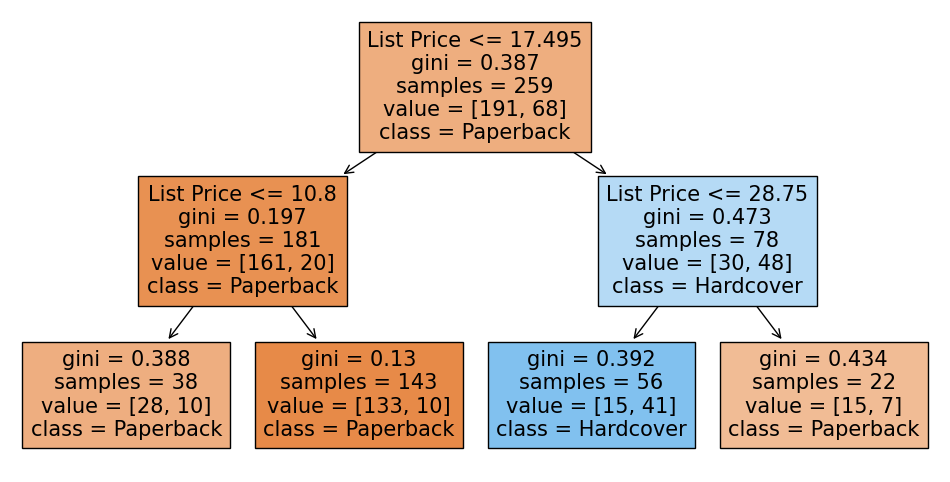

In [1]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load the dataset
url = "https://raw.githubusercontent.com/pointOfive/STA130_F23/main/Data/amazonbooks.csv"
ab = pd.read_csv(url, encoding="ISO-8859-1")

# Select only relevant columns: 'Hard_or_Paper' and 'List Price'
ab_reduced = ab[['Hard_or_Paper', 'List Price']]

# Remove rows with NaN values
ab_reduced_noNaN = ab_reduced.dropna()

# Display the first few rows of the cleaned dataset
print(ab_reduced_noNaN.head())

# Assuming ab_reduced_noNaN is preloaded as a DataFrame
y = pd.get_dummies(ab_reduced_noNaN["Hard_or_Paper"])['H']
X = ab_reduced_noNaN[['List Price']]

# Split the data into training (80%) and test (20%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit a DecisionTreeClassifier with max_depth=2
clf = DecisionTreeClassifier(max_depth=2, random_state=42)
clf.fit(X_train, y_train)

# Visualize the Decision Tree
plt.figure(figsize=(12, 6))
plot_tree(clf, feature_names=["List Price"], class_names=["Paperback", "Hardcover"], filled=True)
plt.show()


In [ ]:
Question 6

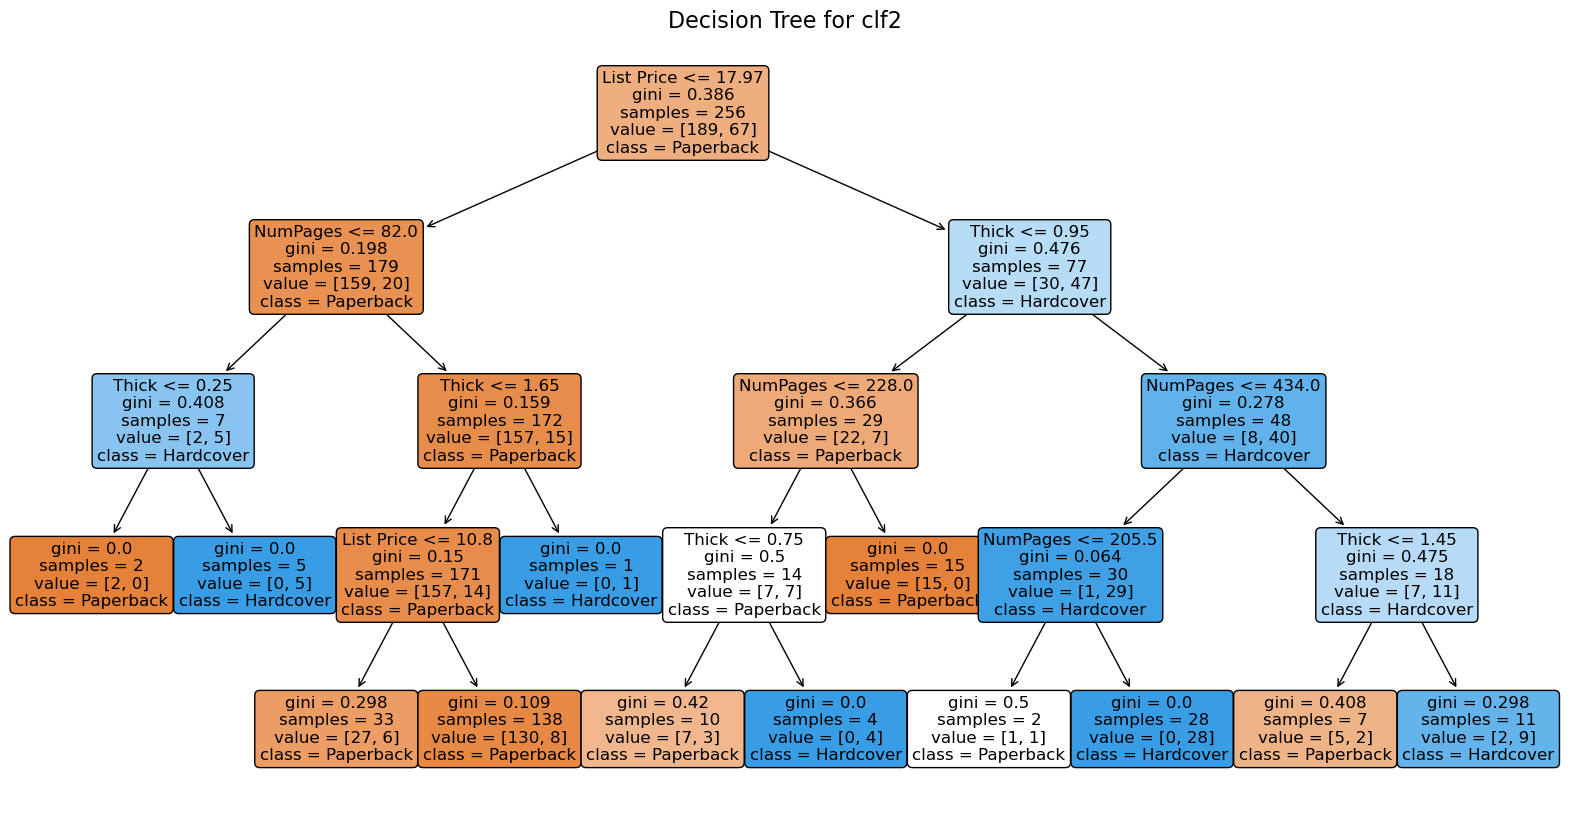

Model clf2:
Sensitivity: 0.579
Specificity: 0.935
Accuracy: 0.831


In [2]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import graphviz
from sklearn import tree

# Load the dataset
url = "https://raw.githubusercontent.com/pointOfive/STA130_F23/main/Data/amazonbooks.csv"
ab = pd.read_csv(url, encoding="ISO-8859-1")

# Select relevant columns: 'Hard_or_Paper', 'List Price', 'NumPages', 'Thick'
required_columns = ['Hard_or_Paper', 'List Price', 'NumPages', 'Thick']
ab_reduced = ab[required_columns]

# Remove rows with any NaN values in the selected columns
ab_reduced_noNaN = ab_reduced.dropna()

# Define the predictor variables and response variable
X = ab_reduced_noNaN[['NumPages', 'Thick', 'List Price']]
y = pd.get_dummies(ab_reduced_noNaN["Hard_or_Paper"])['H']

# Split the data into training (80%) and test (20%) sets with a fixed random seed for reproducibility
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Train a DecisionTreeClassifier with max_depth=4
clf2 = DecisionTreeClassifier(max_depth=4, random_state=42)
clf2.fit(X_train, y_train)

# Visualize the decision tree using plot_tree
plt.figure(figsize=(20, 10))
plot_tree(
    clf2,
    feature_names=["NumPages", "Thick", "List Price"],
    class_names=["Paperback", "Hardcover"],
    filled=True,
    rounded=True,
    fontsize=12
)
plt.title("Decision Tree for clf2", fontsize=16)
plt.show()

# Alternatively, visualize the decision tree using graphviz
dot_data = tree.export_graphviz(
    clf2,
    out_file=None,
    feature_names=["NumPages", "Thick", "List Price"],
    class_names=["Paperback", "Hardcover"],
    filled=True,
    rounded=True,
    special_characters=True
)
graph = graphviz.Source(dot_data)
graph.render("decision_tree_clf2")  # Saves the tree as a PDF file
graph

# Predict on the test data using clf2
y_test_pred_clf2 = clf2.predict(X_test)

# Create confusion matrix for clf2
cm_clf2 = confusion_matrix(y_test, y_test_pred_clf2)

# Compute metrics
tn_clf2, fp_clf2, fn_clf2, tp_clf2 = cm_clf2.ravel()
sensitivity_clf2 = tp_clf2 / (tp_clf2 + fn_clf2)
specificity_clf2 = tn_clf2 / (tn_clf2 + fp_clf2)
accuracy_clf2 = (tp_clf2 + tn_clf2) / (tp_clf2 + tn_clf2 + fp_clf2 + fn_clf2)

# Display metrics with three decimal places
print("Model clf2:")
print(f"Sensitivity: {np.round(sensitivity_clf2, 3)}")
print(f"Specificity: {np.round(specificity_clf2, 3)}")
print(f"Accuracy: {np.round(accuracy_clf2, 3)}")


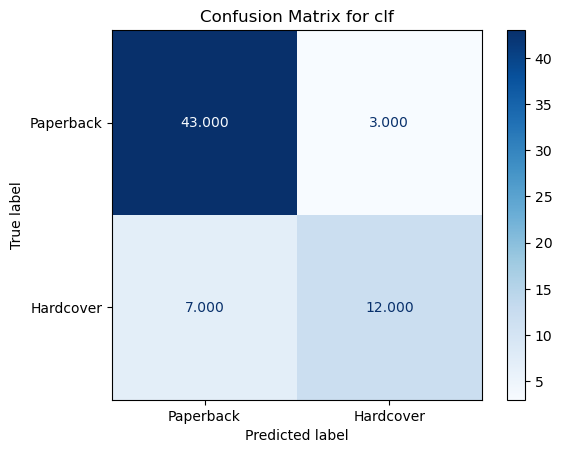

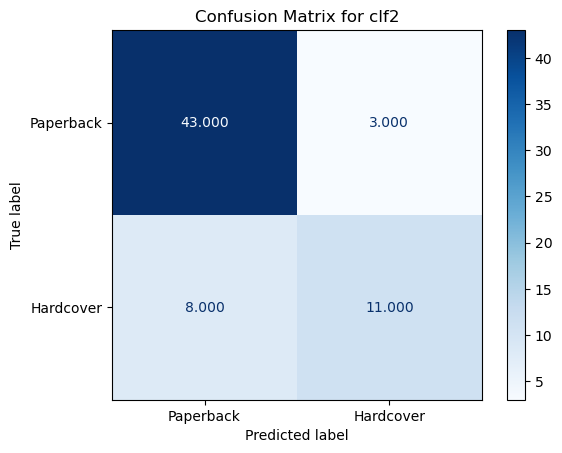

In [3]:
# Train-test split
X = ab_reduced_noNaN[['NumPages', 'Thick', 'List Price']]
y = pd.get_dummies(ab_reduced_noNaN["Hard_or_Paper"])['H']

# Use train_test_split and explicitly assign test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Assign the test data to a variable for clarity
ab_reduced_noNaN_test = X_test.copy()
ab_reduced_noNaN_test['y_test'] = y_test

# For clf: Use only 'List Price'
X_test_clf = ab_reduced_noNaN_test[['List Price']]

# For clf2: Use 'NumPages', 'Thick', and 'List Price'
X_test_clf2 = ab_reduced_noNaN_test[['NumPages', 'Thick', 'List Price']]

# Predict using both models
y_test_pred_clf = clf.predict(X_test_clf)
y_test_pred_clf2 = clf2.predict(X_test_clf2)

# Create confusion matrices
cm_clf = confusion_matrix(ab_reduced_noNaN_test['y_test'], y_test_pred_clf)
cm_clf2 = confusion_matrix(ab_reduced_noNaN_test['y_test'], y_test_pred_clf2)

# Display the confusion matrices
disp_clf = ConfusionMatrixDisplay(confusion_matrix=cm_clf, display_labels=["Paperback", "Hardcover"])
disp_clf.plot(cmap="Blues", values_format=".3f")
plt.title("Confusion Matrix for clf")
plt.show()

disp_clf2 = ConfusionMatrixDisplay(confusion_matrix=cm_clf2, display_labels=["Paperback", "Hardcover"])
disp_clf2.plot(cmap="Blues", values_format=".3f")
plt.title("Confusion Matrix for clf2")
plt.show()


### Question 7

The differences between the two confusion matrices arise from a mismatch between the features used for predictions and the features the model clf was trained on. The first confusion matrix correctly uses only List Price for predictions, consistent with the features clf was trained on. The second confusion matrix incorrectly includes additional features (NumPages and Thick) that clf was not trained to recognize, causing a misalignment in feature space and potentially meaningless predictions.

The confusion matrices for clf and clf2 above are better because they adhere to the models' training: clf uses only List Price, while clf2 uses NumPages, Thick, and List Price. This consistency ensures meaningful evaluation of the models' performance and avoids errors introduced by feature mismatches.

The conversation between ChatBox and me: https://chatgpt.com/c/673f7437-21c0-8001-81d5-871671dd7b0e
        
Here's a summary of our discussions:

1. Metrics (Accuracy, Sensitivity, Specificity, Precision):
   - We discussed real-world applications of various metrics like accuracy, sensitivity, specificity, and precision in classification problems.
   - Accuracy measures overall correctness, while sensitivity focuses on correctly identifying positive instances, and specificity on correctly identifying negative ones. Precision is about how many predicted positives are truly positive.

2. Decision Tree Model (clf and clf2):
   - You were working with a dataset of books and used a DecisionTreeClassifier (`clf` and `clf2`) to predict whether a book is hardcover or paperback based on various features.
   - The task involved splitting the dataset into training and test sets, training the models on different sets of features (`List Price` for `clf`, and `NumPages`, `Thick`, and `List Price` for `clf2`), and visualizing the decision tree models.
   - A confusion matrix was generated to evaluate the performance of both models based on test data.

3. Train-Test Split Issue:
   - An issue arose when the features used in the training and prediction stages did not align, especially when predicting on test data. Specifically, `clf` was trained on `List Price`, but an attempt was made to predict using additional features like `NumPages` and `Thick`, leading to errors.
   - The solution involved ensuring that the correct test data with the same features used in training was applied during predictions for both models.

4. Confusion Matrix Errors:
   - We explored why differences in confusion matrices occur when the models' predictions were based on mismatched features (e.g., predicting with additional features like `NumPages` and `Thick` for `clf`).
   - The correct use of features during training and prediction ensures that the confusion matrices reflect the model's true performance.

This summary captures the key aspects of model training, evaluation, and troubleshooting based on your dataset, along with insights into appropriate metrics and proper feature usage for decision tree classifiers.